In [3]:
import torch
import numpy as np

from agent.agent import Agent
from functions import *
import yaml, os
%matplotlib inline

In [8]:


stock_name = '^HSI'
window_size = 17

with open(os.path.join(os.getcwd(), 'config.yml'), 'r') as stream:
    config = yaml.load(stream)

agent = Agent(window_size, config, is_eval=True)
data = getStockDataVec(stock_name)
l = len(data) - 1
batch_size = 32

state = getState(data, 0, window_size)
total_profit = 0
agent.inventory = []
closes = []
buys = []
sells = []
capital = 100000
actions = np.zeros(l)
for t in range(l):
    action = agent.act(state)
    actions[t] = action
    closes.append(data[t])

    # sit
    next_state = getState(data, t + 1, window_size)
    reward = 0

    if action == 1: # buy
        if capital > data[t]:
            agent.inventory.append(data[t])
            buys.append(data[t])
            sells.append(None)
            capital -= data[t]
        else:
            buys.append(None)
            sells.append(None)

    elif action == 2: # sell
        if len(agent.inventory) > 0:
            bought_price = agent.inventory.pop(0)
            reward = max(data[t] - bought_price, 0)
            total_profit += data[t] - bought_price
            buys.append(None)
            sells.append(data[t])
            capital += data[t]
        else:
            buys.append(None)
            sells.append(None)
    elif action == 0:
        buys.append(None)
        sells.append(None)

    done = True if t == l - 1 else False
    agent.memory.push(state, action, next_state, reward)
    state = next_state

    if done:
        print("--------------------------------")
        print(stock_name + " Total Profit: " + formatPrice(total_profit))
        print("--------------------------------")


<ipython-input-8-f92a020b6226>:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(stream)
/Users/Eric/Desktop/QuantRL/final-product/functions.py:47: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-1*x))


--------------------------------
^HSI Total Profit: $104917.33
--------------------------------


In [ ]:
for a in actions:
    if a == 1.0:
        print(a)


In [5]:
a = np.array([1,2,3])
np.where(a == 2)

(array([1]),)

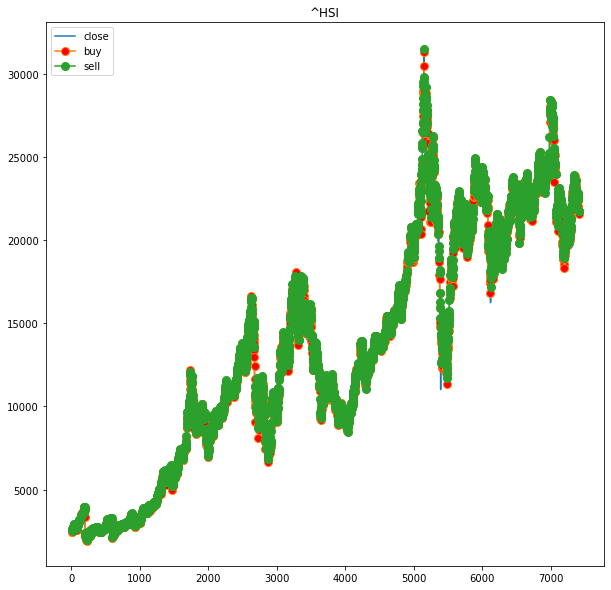

In [9]:
import matplotlib.pyplot as plt
import numpy as np


x_data = range(l)

# From here the plotting starts

plt.figure(figsize=(10, 10))
plt.plot(x_data, closes)
plt.plot(x_data, buys, marker='o', markersize=8, markerfacecolor='r')
plt.plot(x_data, sells, marker='o', markersize=8, )
plt.title(stock_name)
plt.legend(['close', 'buy', 'sell'], loc='upper left')
plt.show()